In [47]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   
%pip install keras
%pip install tensorflow

#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from tensorflow.keras import layers
from tensorflow.keras import activations


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "decision_trees"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# os.makedirs(IMAGES_PATH, exist_ok=True)
# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [25]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [26]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

In [48]:
from functools import reduce
from itertools import chain
import operator 
#function for counting how many units within each layer and how many layers
def count_units(model):
  tot_out = 0
  out_list = []
  for lyr in model.layers:
    if lyr.trainable:
      # This is to tackle any layers that have the output shape as a list of tuples (e.g Input layer)
      if isinstance(lyr.output_shape, list):
        curr_out = reduce(operator.mul, chain(*[s[1:] for s in lyr.output_shape]), 1)
      # This is to tackle other layers like Dense and Conv2D
      elif isinstance(lyr.output_shape, tuple):
        curr_out = reduce(operator.mul, lyr.output_shape[1:], 1)
      else:
        raise TypeError
      tot_out += curr_out
      out_list.append(curr_out)
  print("Total number of output units:",tot_out)
  print("Output units in each layer as a list:",out_list)

Total number of output units: 3
Output units in each layer as a list: [2, 1]


In [50]:
print(df.shape)
df.describe()

(751, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.549769,0.269293,0.422104,0.311932,0.390072,0.304823,0.370040
std,0.146666,0.101750,0.166225,0.128826,0.168133,0.119135,0.154698
min,0.233766,0.003922,0.027778,0.021739,0.055556,0.086957,0.027778
25%,0.422078,0.196078,0.305556,0.217391,0.250000,0.217391,0.250000
50%,0.558442,0.254902,0.416667,0.295652,0.361111,0.282609,0.361111
75%,0.649351,0.313725,0.527778,0.391304,0.500000,0.369565,0.491667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
target_column = ['Legendary']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.549769,0.269293,0.422104,0.311932,0.390072,0.304823,0.370040
std,0.146666,0.101750,0.166225,0.128826,0.168133,0.119135,0.154698
min,0.233766,0.003922,0.027778,0.021739,0.055556,0.086957,0.027778
25%,0.422078,0.196078,0.305556,0.217391,0.250000,0.217391,0.250000
50%,0.558442,0.254902,0.416667,0.295652,0.361111,0.282609,0.361111
75%,0.649351,0.313725,0.527778,0.391304,0.500000,0.369565,0.491667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(525, 7)
(226, 7)


In [31]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [32]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=7))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
# build the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
17/17 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8705
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.9124
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.9124
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.9124
Epoch 5/20
17/17 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.9124
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9124
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.9124
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9181
Epoch 9/20
17/17 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9295
Epoch 10/20
17/17 [==============================] - 0s 3ms/step - loss: 0.1483 - accuracy: 0.9467
Epoch 11/20
17/17 [

In [34]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 0.9733333587646484% 
 Error on training data: 0.026666641235351562
Accuracy on test data: 0.9557521939277649% 
 Error on test data: 0.04424780607223511


In [35]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


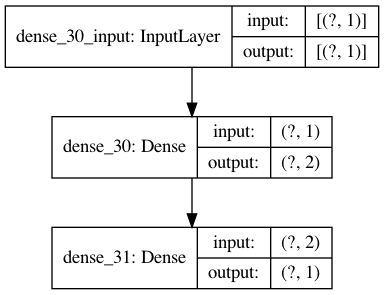

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [51]:
pip install talos

  Using cached talos-0.6.6-py3-none-any.whl (53 kB)
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from talos) (from versions: 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0)
ERROR: No matching distribution found for tensorflow==1.14.0 (from talos)
Note: you may need to restart the kernel to use updated packages.


In [54]:
y

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [